# EDA

First results from search method with new model.

## Importing libraries

In [2]:
import os

os.chdir("../")
import pandas as pd
import matplotlib.pyplot as plt
from post_processing_tools import *
import glob

In [3]:
# data = get_output("output_log/analyse_test12apr.txt")
data = get_output("output_log/fourier_run.txt")
data2 = get_output("output_log/skew_run2_18apr.txt")

In [4]:
len(data)

1573812

Text(0, 0.5, '$S$')

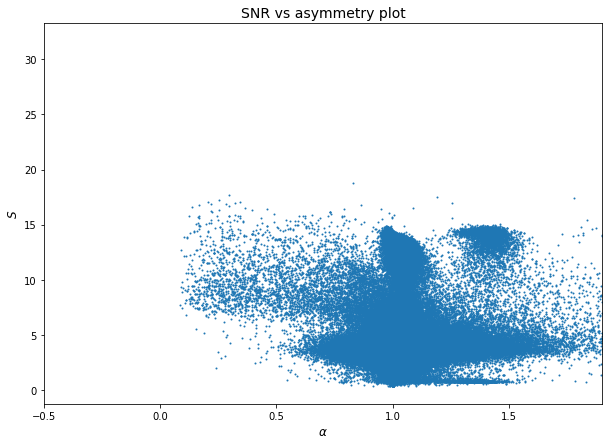

In [5]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(data.asym_score, abs(data.snr), s=1)
ax.set_xlim(-0.5, 1.9)
# ax.set_ylim(-1, 30)
ax.set_title("SNR vs asymmetry plot", fontsize=14)
ax.set_xlabel("$\\alpha$", fontsize=12)
ax.set_ylabel("$S$", fontsize=12)

---

In [10]:
data2[data2.file == "tesslc_96443185.pkl"]

,file,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,skewness,skewness_error,transit_prob,noise_estimate


In [11]:
data[data.file == "tesslc_96443185.pkl"]

,file,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,skewness,skewness_error,transit_prob,noise_estimate


In [16]:
data.head()

,file,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,skewness,skewness_error,transit_prob,noise_estimate
0,tesslc_266071255.pkl,-4.021523,-3.675480,1489.724594,-2.000000,-2.000000,-2.000000,0.437500,-2.000000,0.094834,-0.117,-2.000000,-2.000000,5.989969e+06,end
1,tesslc_436248888.pkl,-18.164379,-16.285289,1473.391560,-3.000000,-3.000000,-3.000000,0.041666,-3.000000,0.016223,0.159,-3.000000,-3.000000,2.121631e+06,point
2,tesslc_124414529.pkl,-5.267998,-5.266090,1476.286372,-3.000000,-3.000000,-3.000000,0.020834,-3.000000,0.015831,0.014,-3.000000,-3.000000,1.559119e+06,point
3,tesslc_77993513.pkl,-3.354078,-3.352420,1481.638860,-3.000000,-3.000000,-3.000000,0.020833,-3.000000,0.021539,-0.050,-3.000000,-3.000000,4.092301e+06,point
4,tesslc_43147737.pkl,-5.518102,-5.515365,1489.495276,-3.000000,-3.000000,-3.000000,0.020833,-3.000000,0.039998,-0.045,-3.000000,-3.000000,2.066175e+06,point
5,tesslc_143121644.pkl,-4.006240,-3.954326,1469.161416,-3.000000,-3.000000,-3.000000,0.041667,-3.000000,0.019399,-0.001,-3.000000,-3.000000,1.175001e+06,point
6,tesslc_317920692.pkl,-4.178185,-3.919559,1472.848655,-3.000000,-3.000000,-3.000000,0.062499,-3.000000,0.016515,-0.111,-3.000000,-3.000000,4.870396e+06,maybeTransit
7,tesslc_123550184.pkl,-13.074491,-2.679064,1473.328269,-2.000000,-2.000000,-2.000000,2.333364,-2.000000,0.169085,-0.261,-2.000000,-2.000000,3.939197e+06,end
8,tesslc_234228628.pkl,-18.043003,-18.040515,1489.495415,-3.000000,-3.000000,-3.000000,0.020834,-3.000000,0.062698,0.060,-3.000000,-3.000000,2.548146e+06,point
9,tesslc_299587527.pkl,-4.289526,-4.291006,1480.286091,-3.000000,-3.000000,-3.000000,0.020833,-3.000000,0.015447,-0.022,-3.000000,-3.000000,1.597872e+06,point


In [7]:
cand = data.loc[
    (abs(data.snr) >= 5)
    & (data.transit_prob == "maybeTransit")
    & (abs(data.skewness) >= 0.5)
].reset_index()

In [8]:
cand

,index,file,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,skewness,skewness_error,transit_prob
0,9,tesslc_247481987.pkl,-24.391226,-13.911350,1473.433276,0.806705,0.238708,0.023787,0.124998,-0.011046,0.028783,0.483,-0.823522,6.348497e+00,maybeTransit
1,23,tesslc_349158094.pkl,-10.936014,-5.902785,1475.427816,1.015748,0.164906,0.171064,0.395839,-0.012032,0.030715,0.112,1.834130,1.281514e+00,maybeTransit
2,30,tesslc_710518736.pkl,-22.521559,-9.721527,1487.724319,1.051476,0.099548,0.096424,0.229166,-0.063521,0.036311,0.196,1.522359,5.719047e-01,maybeTransit
3,40,tesslc_102286180.pkl,-24.196140,-14.317406,1473.433256,1.019851,0.226367,0.031201,0.124998,-0.132574,0.030987,0.397,8803.402896,3.133874e+07,maybeTransit
4,45,tesslc_156694137.pkl,-24.457367,-12.899366,1473.433155,0.928931,0.207292,0.012839,0.124999,-0.019196,0.037575,0.578,-68.898399,4.025507e+03,maybeTransit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90174,1608590,tesslc_97857754.pkl,-25.055433,-14.474720,1473.433260,1.045827,0.181845,0.031323,0.124999,-0.018510,0.025750,0.444,1449.004040,1.185506e+06,maybeTransit
90175,1608615,tesslc_11403561.pkl,-5.663738,-5.160027,1476.724370,1.332175,0.069398,0.024494,0.145831,-0.005343,0.014998,0.021,57.421391,2.337852e+03,maybeTransit
90176,1608652,tesslc_156502092.pkl,-23.400681,-8.596539,1473.329005,0.982922,0.212013,0.100958,0.333328,-0.127870,0.039354,0.535,-228.568731,1.373929e+04,maybeTransit
90177,1608667,tesslc_10001342609.pkl,-22.329212,-13.987638,1473.433117,0.785790,0.194600,0.031079,0.124998,-0.018742,0.025145,0.380,-1.136740,4.442031e+00,maybeTransit


In [9]:
path = "/storage/astro2/phrdhx/tesslcs/tesslcs_sector_6_104/"

## Some candidates

96795030


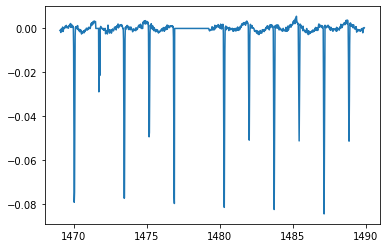

282508949


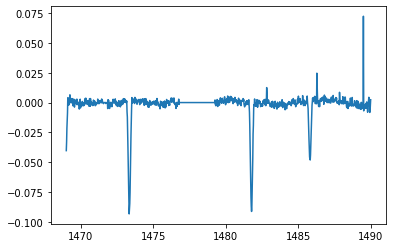

220224470


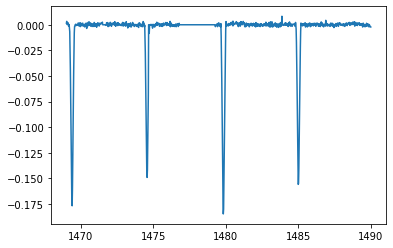

119459681


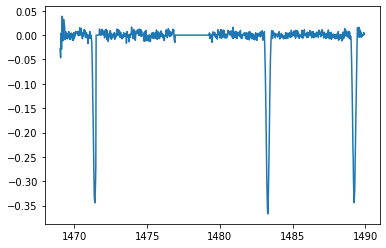

278898284


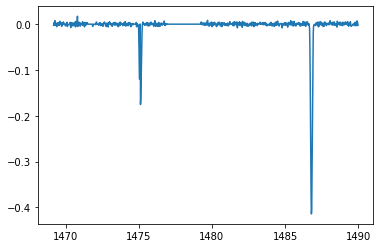

281902167


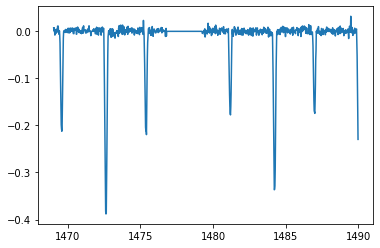

118796862


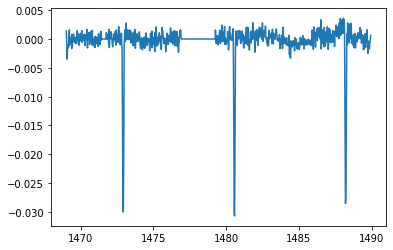

237763716


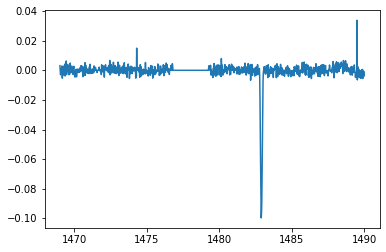

53988092


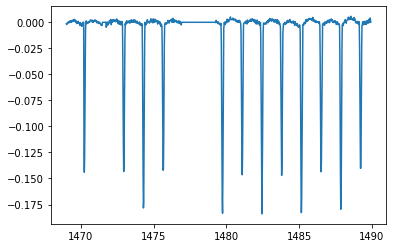

263300036


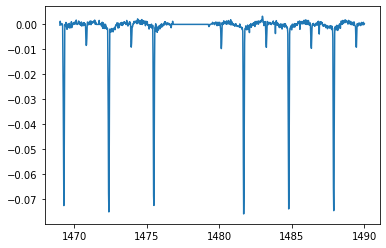

167256810


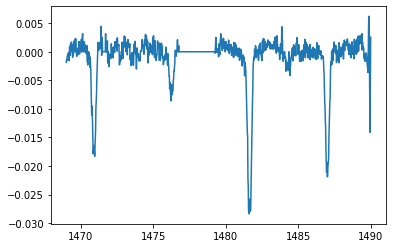

93369792


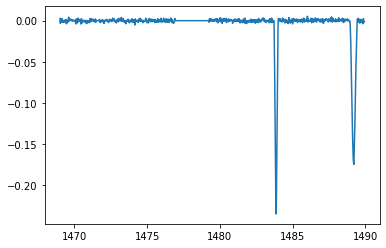

266191510


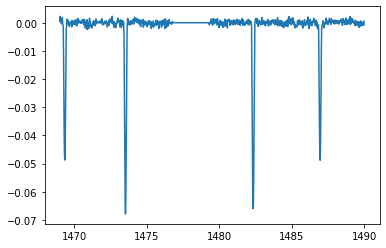

287915338


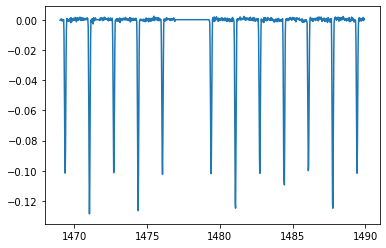

238136622


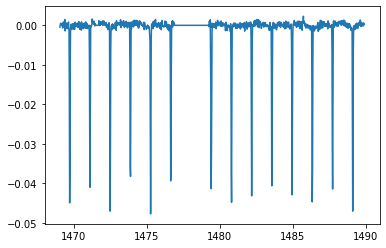

60113970


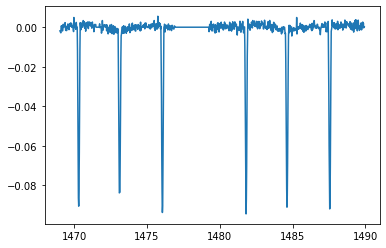

142607687


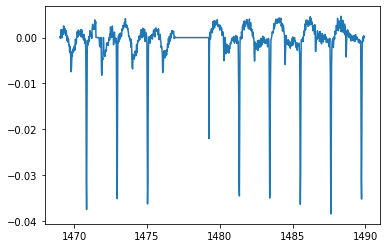

389251749


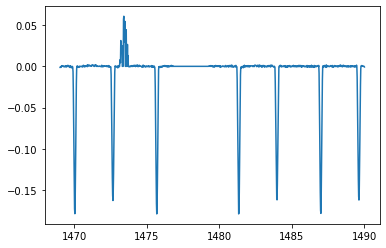

279217728


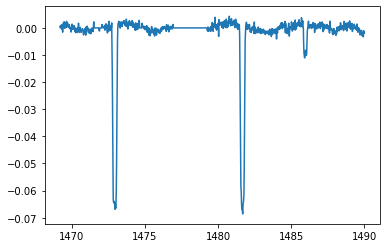

77951245


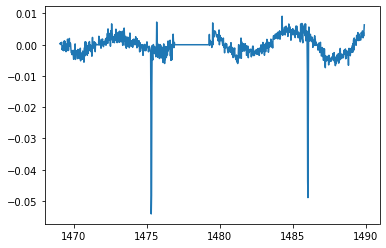

In [9]:
for i in range(len(cand.tail(20))):
    lc_path = glob.glob(os.path.join(path, f"**/{cand.file[i]}"))[0]
    lc, lc_info = import_XRPlightcurve(lc_path, sector=6)
    print(lc_info[0])
    lc = lc["time", "corrected flux", "quality", "flux error"]
    results, data_arrays = processing(lc, lc_info=lc_info, method="median")
    plt.plot(data_arrays[0], data_arrays[1])
    plt.show()

In [10]:
import lightkurve as lk

In [11]:
d = lk.search_lightcurve("TIC 143077962")[0].download()

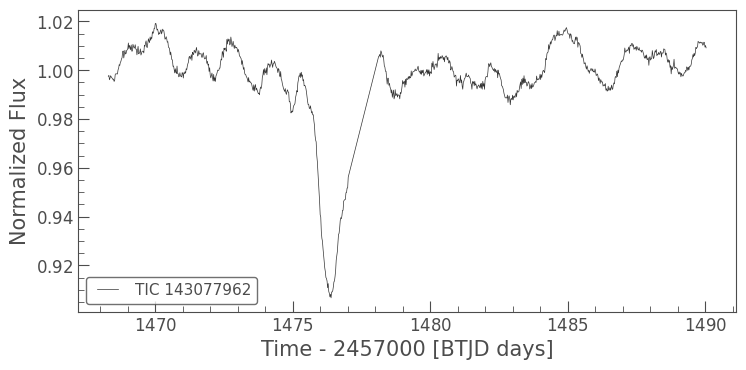

In [12]:
d.plot()

---

### Low asymmetry score

In [13]:
low_asym = data[(data.asym_score <= 0.5) & (data.asym_score > -2)].reset_index()

In [14]:
low_asym.head()

,index,file,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,skewness,skewness_error,transit_prob
0,33,tesslc_421832724.pkl,-1.967565,-0.313326,1473.181902,0.469944,2.747652,0.148126,2.000019,-0.004754,0.123648,-1.107,0.185195,4.768081e+02,maybeTransit
1,65,tesslc_234921971.pkl,-6.865785,-0.952248,1480.287136,0.261726,0.001397,4.156270,2.083342,-0.009357,0.352912,-0.871,17.542667,1.871987e+02,artefact
2,86,tesslc_46638711.pkl,-5.777789,-2.088869,1479.515422,0.413442,0.098449,0.481634,0.541657,-0.001856,0.155155,-0.576,-0.002588,2.064385e+06,artefact
3,100,tesslc_141626947.pkl,-0.872573,-0.132704,1473.176740,0.094815,2.740294,0.424462,1.875003,-0.021212,0.140692,-1.230,33.156385,3.941000e-05,maybeTransit
4,112,tesslc_21729466.pkl,-16.753534,-2.378130,1480.263463,0.160515,2.024459,1.517479,2.020818,-0.003902,0.406422,0.057,17.306901,9.023623e+00,artefact


421832724


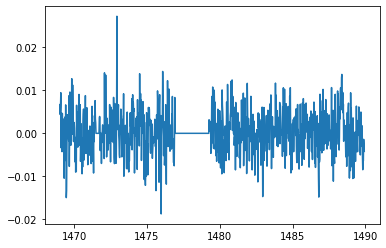

234921971


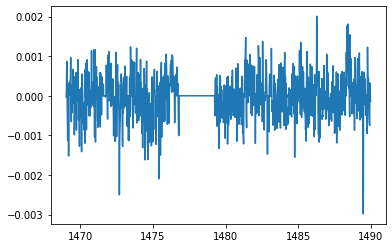

46638711


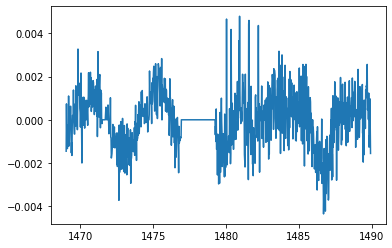

141626947


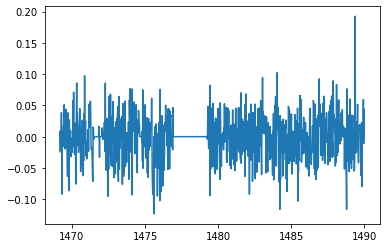

21729466


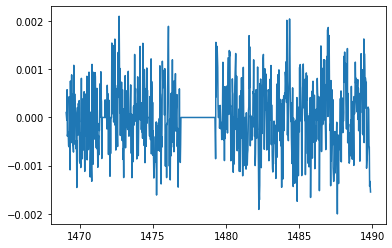

172839629


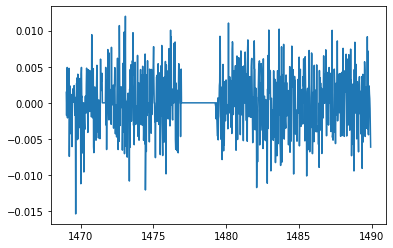

369676525


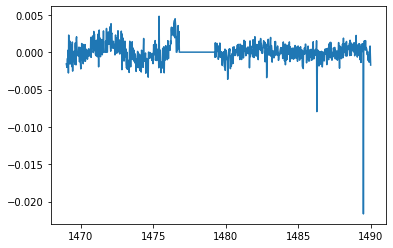

322681426


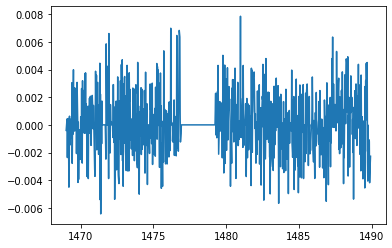

52690976


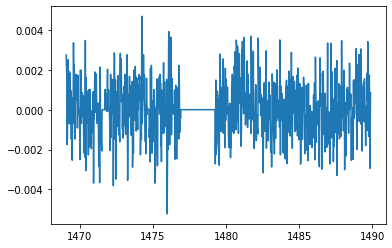

219146379


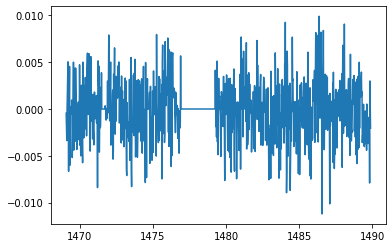

242061401


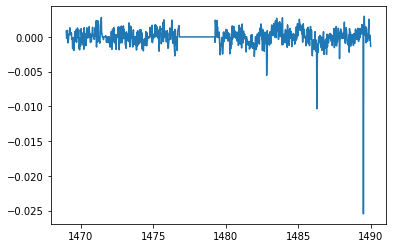

53743975


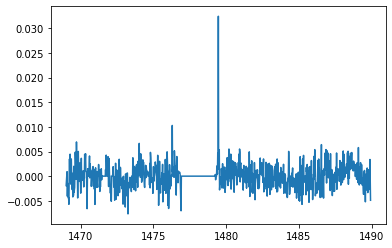

49016464


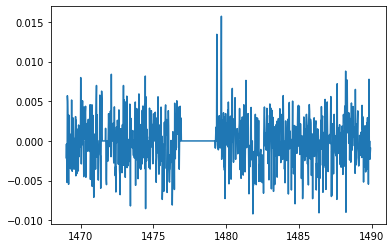

147851867


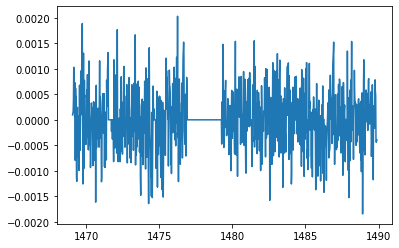

51996726


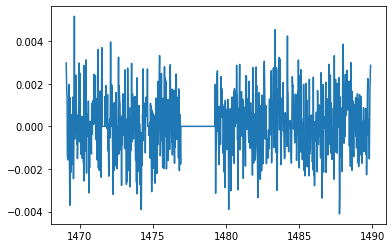

21579142


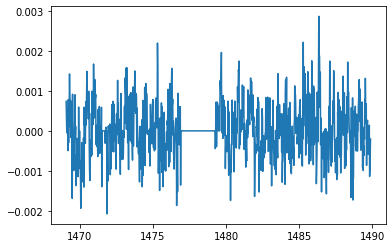

272549131


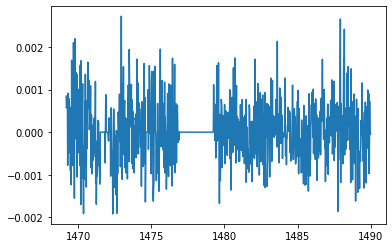

255588213


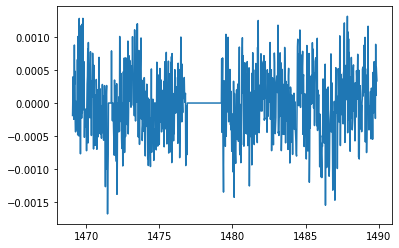

256992798


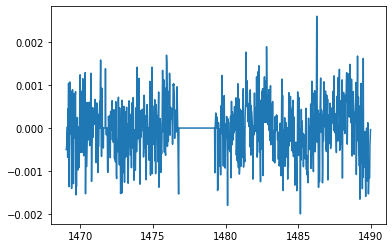

170156938


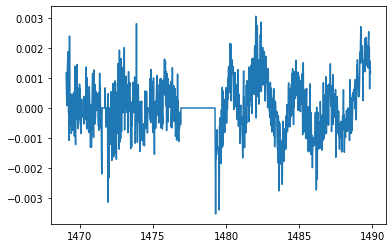

157342027


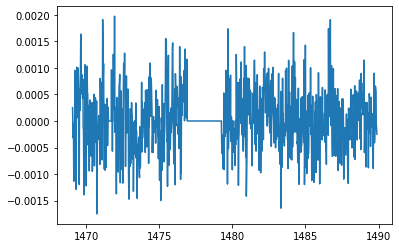

30469193


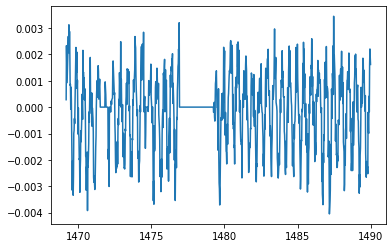

24613041


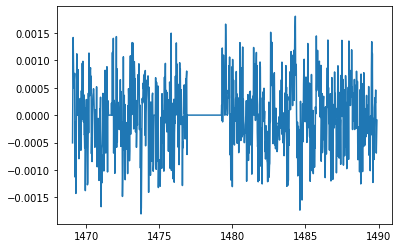

237700366


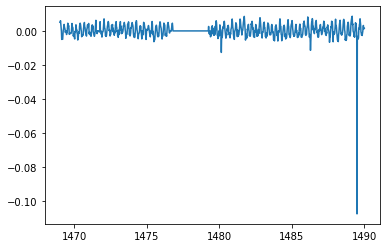

350477880


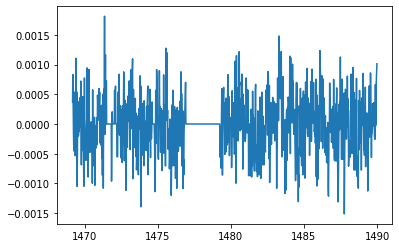

37491225


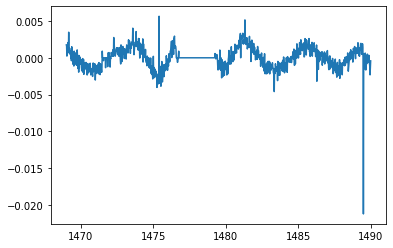

173035393


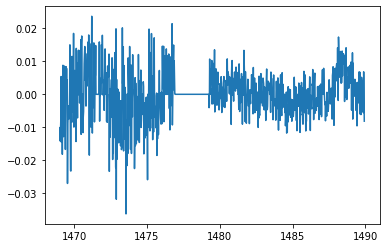

168109978


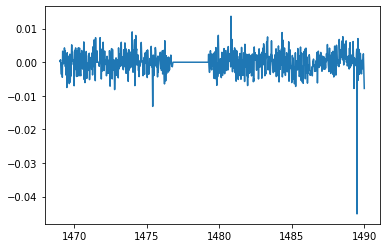

382099053


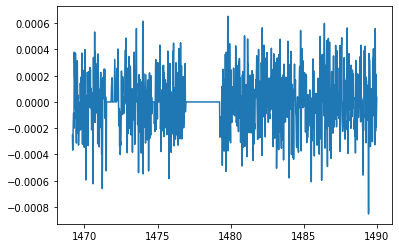

51997774


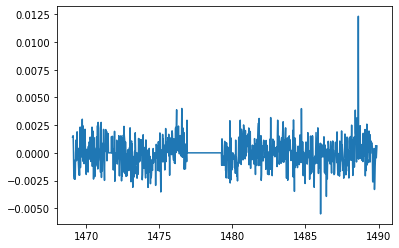

In [15]:
for i in range(len(low_asym.head(30))):
    lc_path = glob.glob(os.path.join(path, f"**/{low_asym.file[i]}"))[0]
    lc, lc_info = import_XRPlightcurve(lc_path, sector=6)
    print(lc_info[0])
    lc = lc["time", "corrected flux", "quality", "flux error"]
    results, data_arrays = processing(lc, lc_info=lc_info, method="median")
    plt.plot(data_arrays[0], data_arrays[1])
    plt.show()

---

### alpha less than 1 for skewed search

In [25]:
data = get_output("output_log/skew_run2_18apr.txt")

In [32]:
alpha_less = data[data.asym_score < 1].reset_index()
path = "/storage/astro2/phrdhx/tesslcs/tesslcs_sector_6_104/"

. -4.34547091 -2.56837314 1485.44979883 -2 -2 -2 2.43752326 -2 0.0314766 0.07 -2 -2 1156575.92429387 end


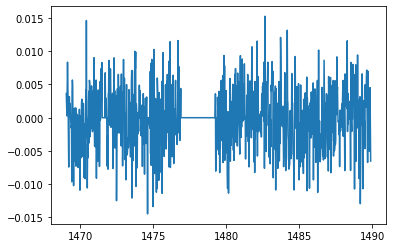

. -3.69117689 -3.7040022 1470.68038811 -3 -3 -3 0.04166588 -3 0.0177009 -0.035 -3 -3 2850597.40285166 point


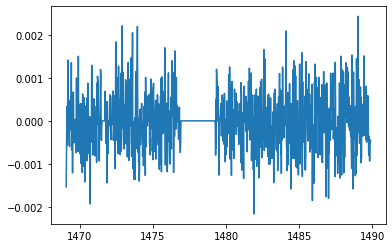

. -3.85865855 -3.85686912 1475.7819989 -3 -3 -3 0.02083328 -3 0.01553438 0.053 -3 -3 1298127.01454509 point


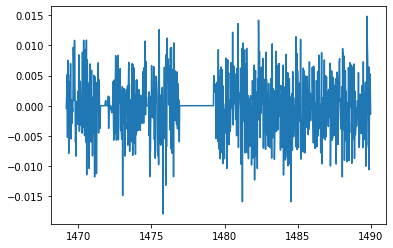

. -4.43560123 -4.20984151 1489.86473506 -2 -2 -2 0.20833714 -2 0.01546187 0.109 -2 -2 1351394.64140504 end


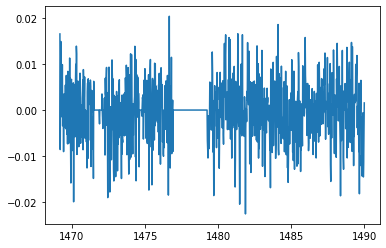

. -5.31242895 -5.21541024 1475.17933729 -3 -3 -3 0.06250062 -3 0.01753199 0.113 -3 -3 3364914.50411608 maybeTransit


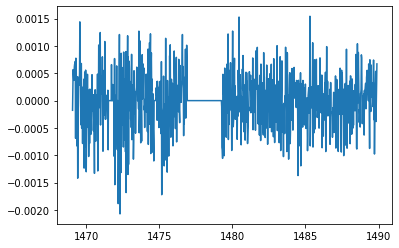

In [35]:
for i in range(len(alpha_less.tail())):
    lc_path = glob.glob(os.path.join(path, f"**/{alpha_less.file[i]}"))[0]
    lc, lc_info = import_XRPlightcurve(lc_path, sector=6)
    lc = lc["time", "corrected flux", "quality", "flux error"]
    results, data_arrays = processing(lc, lc_info=lc_info, method="median")
    print(results)
    plt.plot(data_arrays[0], data_arrays[1])
    plt.show()

### snr vs skewness

(-10.0, 10.0)

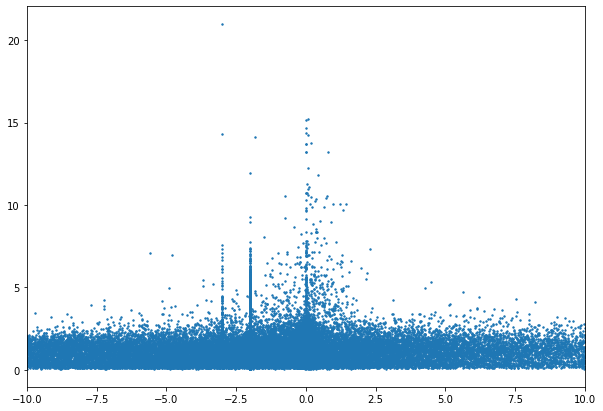

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(data.skewness, abs(data.snr), s=2)
plt.xlim(-10, 10)

In [ ]:
data.loc[(data.asym_score >= 1) & (data.skewness <= 5)]

---

## Skew vs alpha

In [6]:
data = get_output("output_log/skew_run2_18apr.txt")
data

,file,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,skewness,skewness_error,noise_estimate,transit_prob
0,tesslc_237949451.pkl,-4.345471,-2.568373,1485.449799,-2.000000,-2.000000,-2.000000,2.437523,-2.000000,0.031477,0.070,-2.000000,-2.000000e+00,1.156576e+06,end
1,tesslc_167714406.pkl,-3.691177,-3.704002,1470.680388,-3.000000,-3.000000,-3.000000,0.041666,-3.000000,0.017701,-0.035,-3.000000,-3.000000e+00,2.850597e+06,point
2,tesslc_149625445.pkl,-3.858659,-3.856869,1475.781999,-3.000000,-3.000000,-3.000000,0.020833,-3.000000,0.015534,0.053,-3.000000,-3.000000e+00,1.298127e+06,point
3,tesslc_306779051.pkl,-4.435601,-4.209842,1489.864735,-2.000000,-2.000000,-2.000000,0.208337,-2.000000,0.015462,0.109,-2.000000,-2.000000e+00,1.351395e+06,end
4,tesslc_237945543.pkl,-5.312429,-5.215410,1475.179337,-3.000000,-3.000000,-3.000000,0.062501,-3.000000,0.017532,0.113,-3.000000,-3.000000e+00,3.364915e+06,maybeTransit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851990,tesslc_287875100.pkl,-10.633343,-4.577664,1475.385028,1.012054,0.473634,0.234105,0.979187,-0.024250,0.041452,0.162,-3.486606,2.243579e+00,1.189995e+06,maybeTransit
851991,tesslc_151241358.pkl,-24.226761,-12.972302,1473.433323,0.620302,0.219643,0.014191,0.124999,-0.085783,0.036241,0.541,-0.692619,8.490068e+00,6.799747e+06,maybeTransit
851992,tesslc_94988086.pkl,-3.710422,-3.915374,1471.265287,1.000001,0.078756,0.000053,0.145830,-0.007194,0.023671,0.017,0.082586,1.012649e+03,1.275418e+06,maybeTransit
851993,tesslc_340007765.pkl,-4.173440,-4.024098,1487.782511,1.408908,0.110999,0.000000,0.125002,-0.015648,0.013912,0.041,-4310.298784,3.097857e+07,1.286130e+06,maybeTransit


In [9]:
data[data.transit_prob == "maybeTransit"]

,file,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,skewness,skewness_error,noise_estimate,transit_prob
4,tesslc_237945543.pkl,-5.312429,-5.215410,1475.179337,-3.000000,-3.000000,-3.000000,0.062501,-3.000000,0.017532,0.113,-3.000000,-3.000000e+00,3.364915e+06,maybeTransit
6,tesslc_157010496.pkl,-6.613190,-3.289372,1483.617092,1.215830,0.241615,0.017009,0.250002,-0.000823,0.050348,0.120,-10.428499,8.417812e+00,3.020617e+07,maybeTransit
10,tesslc_308164224.pkl,-8.253269,-2.816923,1472.495650,1.102545,0.452109,0.049667,0.604170,-0.000608,0.104547,-0.104,-9.364322,7.167066e+00,3.957588e+07,maybeTransit
11,tesslc_60176844.pkl,-3.816841,-3.428677,1475.660672,1.000142,0.271534,0.250512,0.229167,-0.012285,0.016575,-0.072,0.779629,5.322624e+00,1.403175e+06,maybeTransit
13,tesslc_425065927.pkl,-5.734088,-5.295935,1473.885651,-3.000000,-3.000000,-3.000000,0.062500,-3.000000,0.017603,0.129,-3.000000,-3.000000e+00,3.564171e+06,maybeTransit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851990,tesslc_287875100.pkl,-10.633343,-4.577664,1475.385028,1.012054,0.473634,0.234105,0.979187,-0.024250,0.041452,0.162,-3.486606,2.243579e+00,1.189995e+06,maybeTransit
851991,tesslc_151241358.pkl,-24.226761,-12.972302,1473.433323,0.620302,0.219643,0.014191,0.124999,-0.085783,0.036241,0.541,-0.692619,8.490068e+00,6.799747e+06,maybeTransit
851992,tesslc_94988086.pkl,-3.710422,-3.915374,1471.265287,1.000001,0.078756,0.000053,0.145830,-0.007194,0.023671,0.017,0.082586,1.012649e+03,1.275418e+06,maybeTransit
851993,tesslc_340007765.pkl,-4.173440,-4.024098,1487.782511,1.408908,0.110999,0.000000,0.125002,-0.015648,0.013912,0.041,-4310.298784,3.097857e+07,1.286130e+06,maybeTransit


Text(0, 0.5, 'snr')

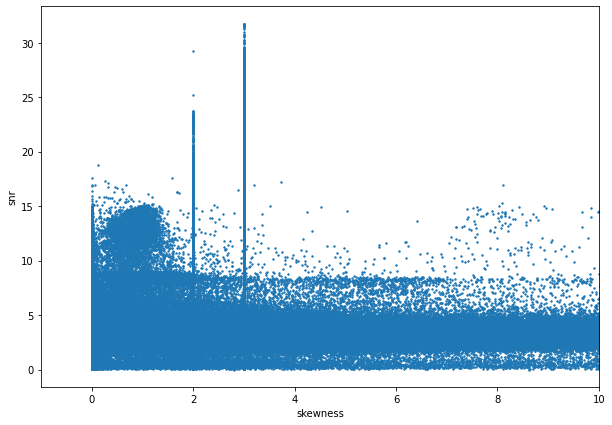

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(abs(data.skewness), abs(data.snr), s=2)
plt.xlim([-1, 10])
plt.xlabel("skewness")
plt.ylabel("snr")

Text(0.5, 0, 'alpha')

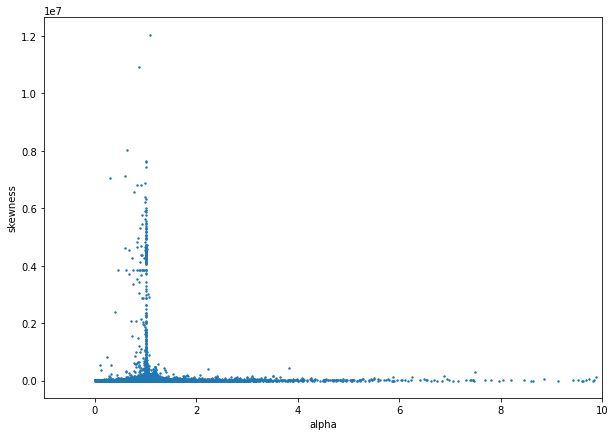

In [24]:
plt.figure(figsize=(10, 7))
plt.scatter(abs(data.asym_score), abs(data.skewness), s=2)
plt.xlim([-1, 10])

plt.ylabel("skewness")
plt.xlabel("alpha")